In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
product = pd.read_csv('Supermarket dataset/product.csv')
transaction_data = pd.read_csv('Supermarket dataset/transaction_data.csv')
hh_demographic = pd.read_csv('Supermarket dataset/hh_demographic.csv')

In [22]:
hh_demographic["MARITAL_STATUS_CODE"].replace(['A', 'B', 'U'],['Married','Unknown','Single'],inplace=True)

hh_demographic

C:\Users\Dell\AppData\Local\Temp\ipykernel_6348\2055451084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hh_demographic["MARITAL_STATUS_CODE"].replace(['A', 'B', 'U'],['Married','Unknown','Single'],inplace=True)


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,Single,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,Single,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,Unknown,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
796,35-44,Single,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,45-54,Married,75-99K,Homeowner,Unknown,3,1,2496
798,45-54,Single,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,25-34,Single,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [23]:
#  Get a list of all unique household keys in transaction_data
trans_hh_keys = list(transaction_data.household_key.unique())

#  Get a list of all unique household keys in hh_demoographics
demo_hh_keys = list(hh_demographic.household_key.unique())

In [24]:
##find common items in two lists

def common(x, y):
    x_set = set(x) 
    y_set = set(y) 
    if (x_set & y_set): 
        return list((x_set & y_set))
    else: 
        print("No common elements")

In [25]:
#unique household keys that transaction data AND demographic data is avaliable 
trans_and_demo_hh_keys = common(trans_hh_keys, demo_hh_keys)

print("Common households for transaction AND demongraphic data is " + str(len(trans_and_demo_hh_keys)))

Common households for transaction AND demongraphic data is 801


In [26]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [27]:
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,Single,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,Single,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,Unknown,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [28]:
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [29]:
trans_data_baskets_hh_key = pd.DataFrame(transaction_data.groupby(['household_key', 'BASKET_ID']).sum()).drop(['DAY', 'PRODUCT_ID','QUANTITY', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1)

In [30]:
trans_data_baskets_hh_key = trans_data_baskets_hh_key.merge(transaction_data.drop(['SALES_VALUE', 'PRODUCT_ID', 'QUANTITY', 'RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1), on="BASKET_ID").drop_duplicates(subset=['BASKET_ID'])

In [31]:
trans_data_baskets_hh_key.head()

,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO
0,27601281299,78.66,1,51,436,1456,8
30,27774192959,41.10,1,67,436,2002,10
42,28024266849,26.90,1,88,436,1604,13
54,28106322445,63.43,1,94,436,1937,14
77,28235481967,53.45,1,101,436,1603,15


In [32]:
spend_demo_data = trans_data_baskets_hh_key.merge(hh_demographic, on='household_key')
spend_demo_data.head()

,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,27601281299,78.66,1,51,436,1456,8,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,27774192959,41.10,1,67,436,2002,10,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
2,28024266849,26.90,1,88,436,1604,13,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
3,28106322445,63.43,1,94,436,1937,14,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
4,28235481967,53.45,1,101,436,1603,15,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown


Sorting Spending Demographic Data by Age Group and Income Group

In [33]:
#  Get the unique age_groups in AGE_DSC
age_groups = sorted(list(spend_demo_data.AGE_DESC.unique()))
print("Age Groups in the dataset are " + str(age_groups) + ".")

Age Groups in the dataset are ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'].


In [34]:
age_group_spending_dfs = []

for group in age_groups:
    age_group_spending_dfs.append(spend_demo_data[spend_demo_data['AGE_DESC'] == group])
    
    
# Group and Name the Transaction Spending DataFrames by Age Group
age_19_24 = age_group_spending_dfs[0]
age_25_34 = age_group_spending_dfs[1]
age_35_44 = age_group_spending_dfs[2]
age_45_54 = age_group_spending_dfs[3]
age_55_64 = age_group_spending_dfs[4]
age_65 = age_group_spending_dfs[5]

In [35]:
print(age_19_24)

          BASKET_ID  SALES_VALUE  household_key  DAY  STORE_ID  TRANS_TIME  \
3226    28331676746        17.96             48  112       370        1403   
3227    28331676750        10.52             48  112       370        1404   
3228    28331677048         2.51             48  112       370        1502   
3229    28331678510         2.28             48  112       370        1841   
3230    28571487656        23.84             48  125       370        1638   
...             ...          ...            ...  ...       ...         ...   
137259  41587582220         5.79           2432  658       410        2157   
137260  41627881959        20.26           2432  661       410        1921   
137261  42009482578         7.12           2432  690       410        2219   
137262  42097617275         8.93           2432  697       410        2253   
137263  42263536219        17.26           2432  709       352        1956   

        WEEK_NO AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOW

In [36]:
#  Get the unique age_groups in INCOME_DESC
income_groups = sorted(list(spend_demo_data.INCOME_DESC.unique()))
print("Income Groups in the dataset are " + str(income_groups) + ".")

Income Groups in the dataset are ['100-124K', '125-149K', '15-24K', '150-174K', '175-199K', '200-249K', '25-34K', '250K+', '35-49K', '50-74K', '75-99K', 'Under 15K'].


In [37]:
income_group_dfs = []

# append each individual age group dataframe to the list
for group in income_groups:
    income_group_dfs.append(spend_demo_data[spend_demo_data['INCOME_DESC'] == group])

income_100_124K = income_group_dfs[0]
income_125_149K = income_group_dfs[1]
income_15_24K = income_group_dfs[2]
income_150_174K = income_group_dfs[3]
income_175_199K = income_group_dfs[4]
income_200_249K = income_group_dfs[5]
income_25_34K = income_group_dfs[6]
income_250K = income_group_dfs[7]
income_35_49K = income_group_dfs[8]
income_50_74K = income_group_dfs[9]
income_75_99K = income_group_dfs[10]
income_Under_15K = income_group_dfs[11]

Weekly Spending by Age and Income Groups

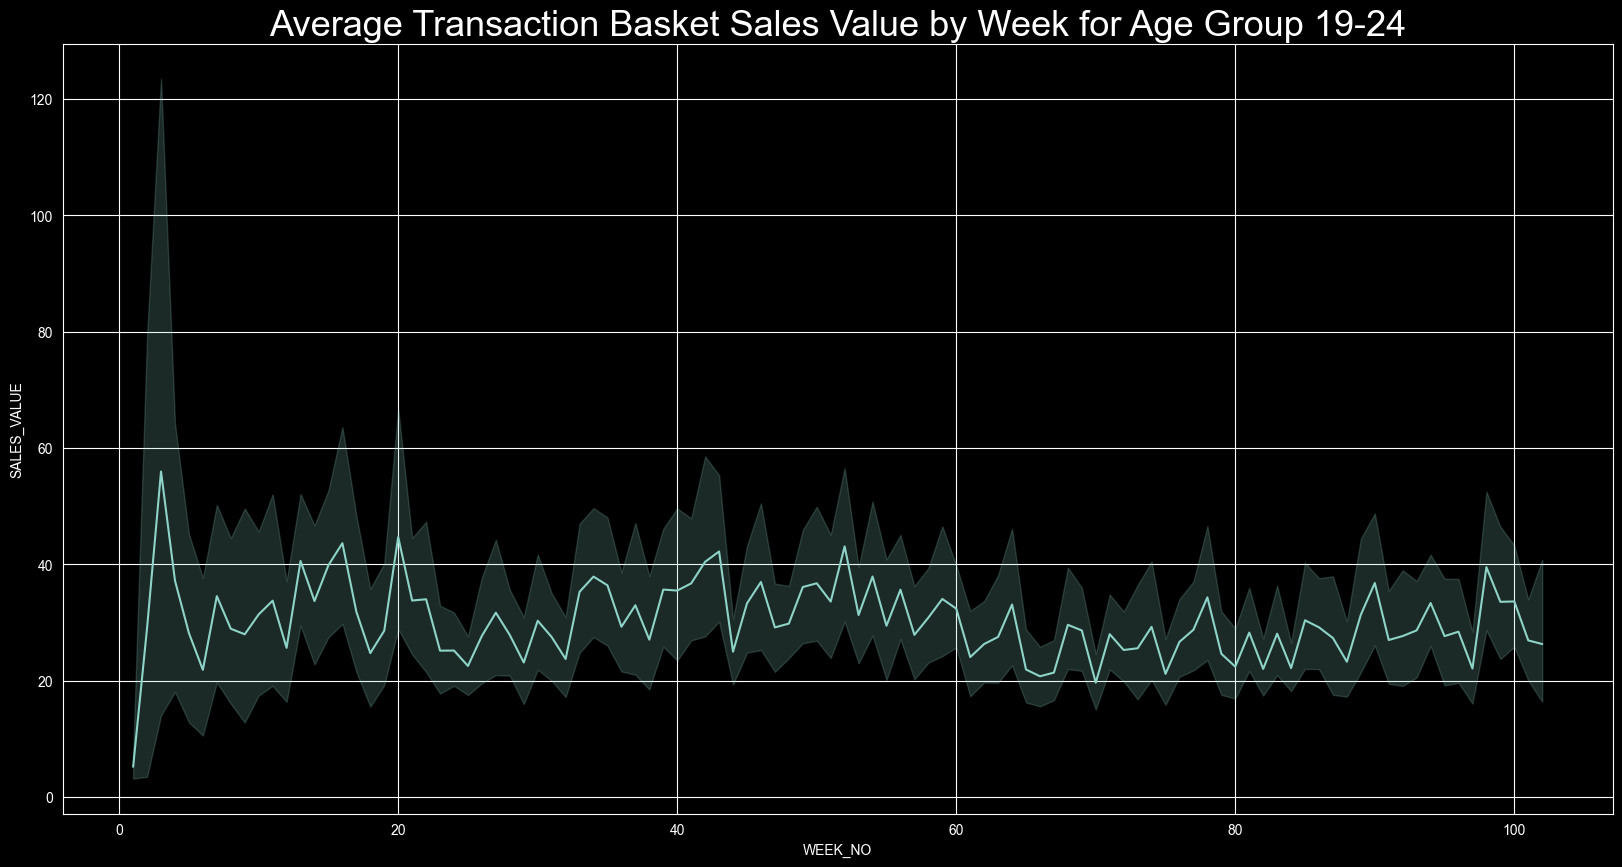

In [38]:
sns.set_style("darkgrid")
plt.style.use("dark_background")

avg_weekly_sales_19_24 = age_19_24[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Age Group 19-24", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_19_24,
                  markers=True)

In [39]:
spend_demo_data.head()

,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,27601281299,78.66,1,51,436,1456,8,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,27774192959,41.10,1,67,436,2002,10,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
2,28024266849,26.90,1,88,436,1604,13,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
3,28106322445,63.43,1,94,436,1937,14,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
4,28235481967,53.45,1,101,436,1603,15,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown


<Axes: xlabel='AGE_DESC', ylabel='SALES_VALUE'>

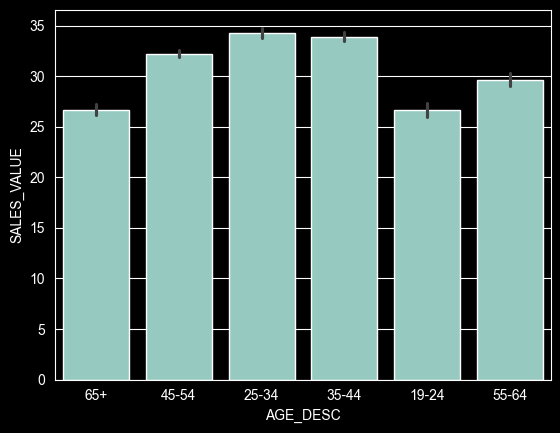

In [40]:
sns.barplot(x='AGE_DESC',y='SALES_VALUE',data=spend_demo_data)

In [41]:
spend_demo_data.describe()

,BASKET_ID,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO
count,1.403390e+05,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000
mean,3.411380e+10,32.048940,1240.944271,393.636608,3381.265151,1540.402461,56.934017
std,4.654299e+09,38.308015,721.920904,185.936698,9276.932867,416.637177,26.563007
min,2.698490e+10,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.057884e+10,7.950000,631.000000,236.000000,330.000000,1245.000000,34.000000
50%,3.293191e+10,19.750000,1228.000000,400.000000,372.000000,1604.000000,58.000000
75%,4.012709e+10,40.210000,1879.000000,553.000000,424.000000,1841.000000,80.000000
max,4.230271e+10,961.490000,2499.000000,711.000000,34280.000000,2359.000000,102.000000


In [42]:
spend_demo_data.describe(include=['object'])

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
count,140339,140339,140339,140339,140339,140339,140339
unique,6,3,12,5,6,5,4
top,45-54,Single,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
freq,51394,62822,32224,84814,43221,53845,97444


<Axes: xlabel='MARITAL_STATUS_CODE', ylabel='SALES_VALUE'>

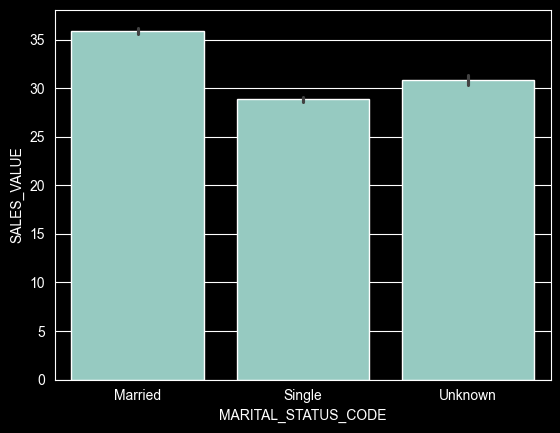

In [43]:
sns.barplot(x='MARITAL_STATUS_CODE',y='SALES_VALUE',data=spend_demo_data)

<Axes: xlabel='INCOME_DESC', ylabel='SALES_VALUE'>

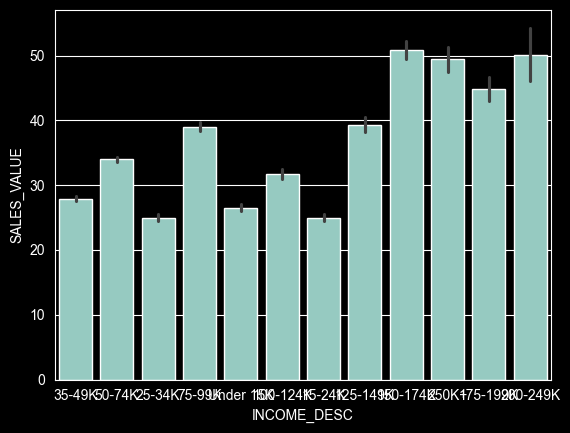

In [44]:
sns.barplot(x='INCOME_DESC',y='SALES_VALUE',data=spend_demo_data)

<Axes: xlabel='INCOME_DESC', ylabel='SALES_VALUE'>

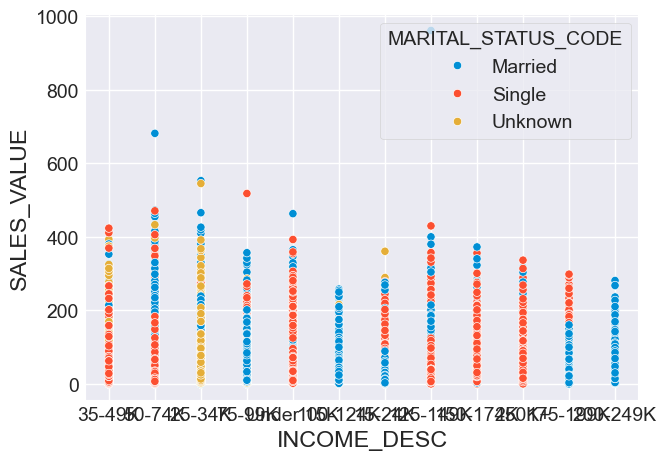

In [45]:
plt.style.use("fivethirtyeight")
sns.set_style("dark")
sns.set_style("darkgrid")
sns.scatterplot(x='INCOME_DESC',y='SALES_VALUE',data=spend_demo_data,hue='MARITAL_STATUS_CODE')

<Axes: xlabel='HOUSEHOLD_SIZE_DESC', ylabel='SALES_VALUE'>

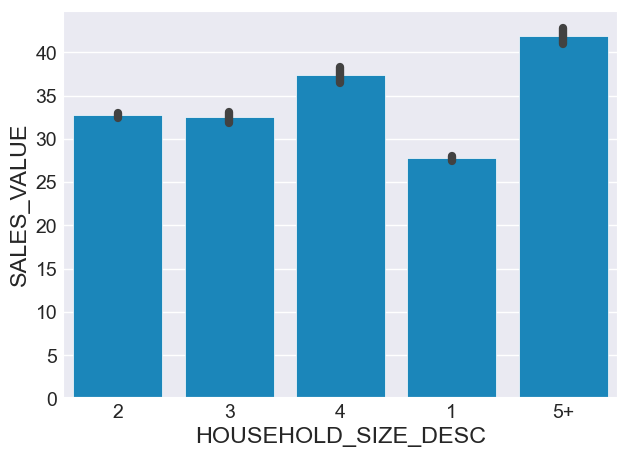

In [46]:
sns.barplot(x='HOUSEHOLD_SIZE_DESC',y='SALES_VALUE',data=spend_demo_data)

Text(0.5, 1.0, 'Age Groups  Comes to the Supermarket')

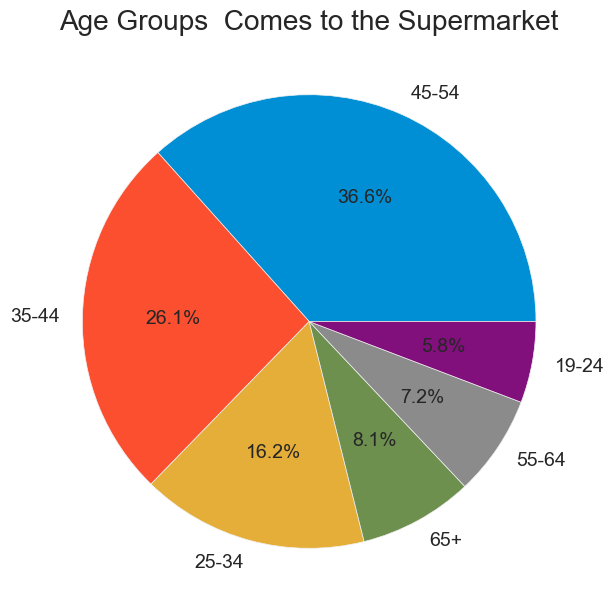

In [47]:
labels = spend_demo_data.AGE_DESC.value_counts().index
sizes = spend_demo_data.AGE_DESC.value_counts()

fig, ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')
plt.pie(spend_demo_data.AGE_DESC.value_counts(), labels=labels, autopct='%1.1f%%')
plt.title("Age Groups  Comes to the Supermarket")

Text(0.5, 1.0, 'Income Groups Comes to the Supermarket')

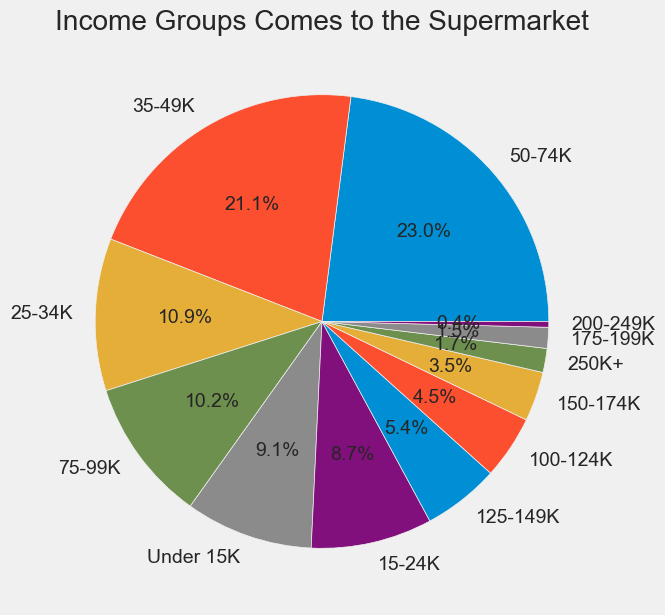

In [48]:
labels = spend_demo_data.INCOME_DESC.value_counts().index
sizes = spend_demo_data.INCOME_DESC.value_counts()

fig, ax = plt.subplots(figsize=(7,7))
plt.style.use('fivethirtyeight')
plt.pie(spend_demo_data.INCOME_DESC.value_counts(), labels=labels, autopct='%1.1f%%')
plt.title("Income Groups Comes to the Supermarket")

<Axes: title={'center': 'Marital Status of Customers Comes to the Supermarket'}, xlabel='MARITAL_STATUS_CODE', ylabel='count'>

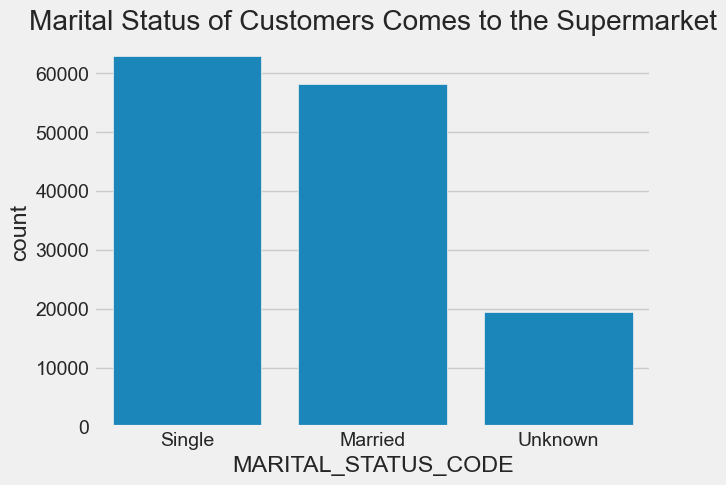

In [51]:
# Calculate value counts
marital_status_counts = spend_demo_data.MARITAL_STATUS_CODE.value_counts().reset_index()

# Rename columns for clarity
marital_status_counts.columns = ['MARITAL_STATUS_CODE', 'count']

# Plot using sns.barplot
plt.title("Marital Status of Customers Comes to the Supermarket")
sns.barplot(x='MARITAL_STATUS_CODE', y='count', data=marital_status_counts)

<Axes: xlabel='MARITAL_STATUS_CODE', ylabel='SALES_VALUE'>

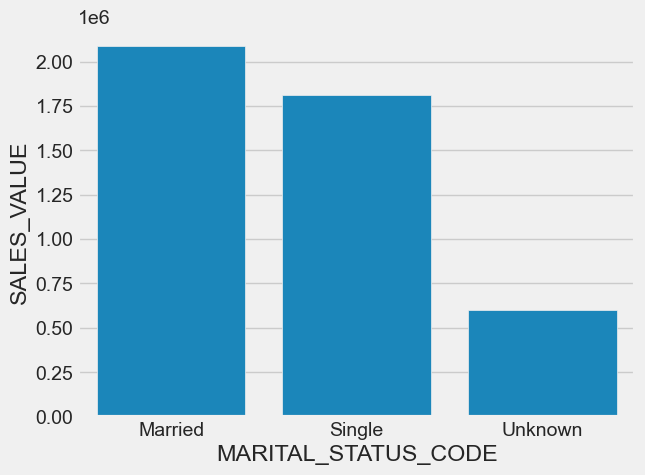

In [52]:
# Aggregate the data: Sum sales by marital status
marital_sales = spend_demo_data.groupby('MARITAL_STATUS_CODE')['SALES_VALUE'].sum().reset_index()

# Plot the aggregated data
sns.barplot(x='MARITAL_STATUS_CODE', y='SALES_VALUE', data=marital_sales)